# With sklearn

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
lr = LinearRegression()

X = np.array([10,9,2, 15, 10, 16, 11, 16], dtype=np.float64)
y = np.array([95, 80, 10, 50, 45, 98, 38, 93], dtype=np.float64)
lr.fit(X.reshape(-1,1),y.reshape(-1,1))
line_y = lr.predict(X.reshape(-1,1))
plt.plot(X,line_y,label='best fit line')
plt.scatter(X,y,color='red')
plt.xlabel('Number of hours spent driving')
plt.ylabel('Risk score on scale of 0-100')
plt.title("Best fit line Graph")
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

## Slope

In [2]:
lr.coef_

array([[4.58789861]])

## Intercept

In [3]:
lr.intercept_

array([12.58462796])

# Default Dataset

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

In [5]:
boston.target.shape

(506,)

## Visualize data

In [6]:
import pandas as pd
pd.DataFrame(boston.data, columns=boston.feature_names).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Create Model

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston.data,
boston.target, test_size=0.1)
lr = LinearRegression(normalize=True)
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

### Accuracy

In [8]:
lr.score(X_test, Y_test)

0.6754754349433416

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, boston.data, boston.target, cv=7,
scoring='neg_mean_squared_error')

In [10]:
scores.mean()

-37.28723086835312

In [11]:
scores.std()

46.78955638802006

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, boston.data, boston.target, cv=10,
scoring='r2')

In [13]:
scores.mean()

0.20252899006056463

In [14]:
scores.std()

0.595296016951227

In [15]:
print('y = ' + str(lr.intercept_) + ' ')

y = 34.99954800610426 


In [16]:
lr.coef_

array([-1.13647312e-01,  4.11362126e-02, -9.08941042e-03,  2.06450733e+00,
       -1.52960163e+01,  3.91723018e+00, -3.99852381e-03, -1.35618005e+00,
        3.02208786e-01, -1.29648115e-02, -9.59958685e-01,  7.94214320e-03,
       -4.72104433e-01])

In [17]:
# for i, c in enumerate(lr.coef_):
#     print(str(c) + ' * x' + str(i))
pd.DataFrame(lr.coef_,boston.feature_names)

,0
CRIM,-0.113647
ZN,0.041136
INDUS,-0.009089
CHAS,2.064507
NOX,-15.296016
RM,3.917230
AGE,-0.003999
DIS,-1.356180
RAD,0.302209
TAX,-0.012965


In [18]:
from sklearn.linear_model import LinearRegression, Ridge
lr = LinearRegression(normalize=True)

### Cross-val scores

In [19]:
rg = Ridge(0.001, normalize=True)
lr_scores = cross_val_score(lr, boston.data, boston.target, cv=10)
lr_scores.mean()

0.20252899006056463

In [20]:
rg_scores = cross_val_score(rg, boston.data, boston.target, cv=10)
rg_scores.mean()

0.20516612972117163

## Visualize data

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

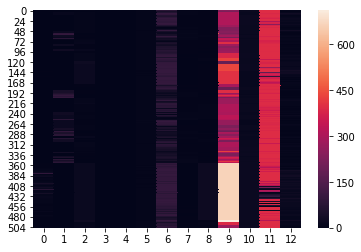

In [22]:
sns.heatmap(boston.data)
plt.show()

# Without sklearn

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean


X = np.array([ 10,9,2, 15, 10, 16, 11, 16], dtype=np.float64)
y = np.array([95, 80, 10, 50, 45, 98, 38, 93], dtype=np.float64)

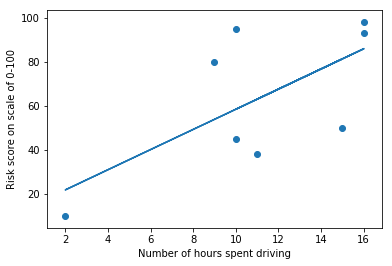

In [24]:
m = (((mean(X)* mean(y)) - mean(X*y)) / 
	((mean(X)*mean(X)) - mean(X*X)))

b = mean(y) - m*mean(X)

line_y = [res for res in (m*X+b)]

plt.plot(X, line_y)
plt.scatter(X, y)
plt.xlabel('Number of hours spent driving')
plt.ylabel('Risk score on scale of 0-100')
plt.show()